In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create a MinMaxScaler object
scaler = MinMaxScaler()

# Load the dataset
df = pd.read_csv("dataset_mod.csv")

num_na_rows = df.isnull().sum(axis=1).astype(bool).sum()
total_rows = df.shape[0]

print('Number of N/A rows: {}'.format(num_na_rows))
print('Number of total rows: {}'.format(total_rows))

#remove N/A values
df.dropna() 
print('Number of records after removing N/A values: {}'.format(df.shape[0]))

Number of N/A rows: 0
Number of total rows: 1935
Number of records after removing N/A values: 1935


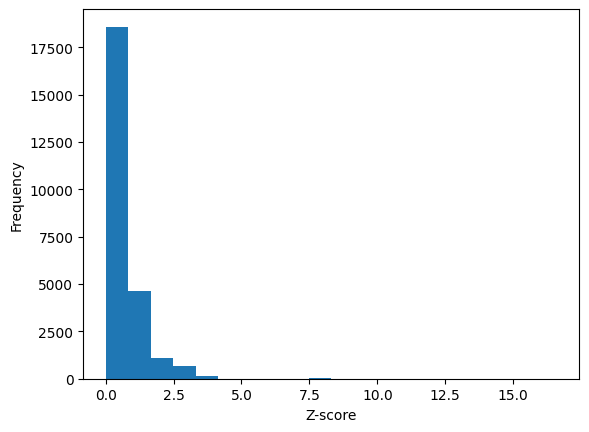

Number of rows after removing outliers using 4 std dev: 1326
Number of rows after removing outliers using 5 std dev: 1896
Number of rows that are within std dev 4 to 5: 570
1326


In [23]:
# Calculate the z-scores for each data point
# z_scores = np.abs((df - df.mean()) / df.std())
z_scores = np.abs(stats.zscore(df))
# print(z_scores)

# Plot the distribution of the z-scores to understand the outliers lied at in the distribution
plt.hist(z_scores.values.flatten(), bins=20)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

# Choose a threshold based on the distribution of the z-scores
min_threshold = 2.5
max_threshold = 5
print('Number of rows after removing outliers using 4 std dev: {}'.format(df[(z_scores < min_threshold).all(axis=1)].shape[0]))
print('Number of rows after removing outliers using 5 std dev: {}'.format(df[(z_scores < max_threshold).all(axis=1)].shape[0]))
print('Number of rows that are within std dev 4 to 5: {}'.format(abs(df[(z_scores < min_threshold).all(axis=1)].shape[0]- df[(z_scores < max_threshold).all(axis=1)].shape[0])))

df = df[(z_scores < min_threshold).all(axis=1)]
print(df.shape[0])

In [24]:

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head(20)

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,placenta_site_previa,amniotic_anhydramnios,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil,delivery_mode
0,0.781786,0.769231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.781786,0.769231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.177970,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.577433,0.807692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.577433,0.807692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.577433,0.807692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.577433,0.807692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.276941,0.653846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.284245,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.284245,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:

X = df.drop(columns='delivery_mode', axis=1)
print(X.shape)
y = df['delivery_mode']

# X = df_normalized.drop(columns='delivery_mode', axis=1)
# print(X.shape)
# y = df_normalized['delivery_mode']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Train a Random Forest classifier with 100 trees
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# Initialize the random forest classifier with hyperparameters
#rfc = RandomForestClassifier(n_estimators=100, max_depth=17, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=17, min_samples_leaf=1, min_samples_split=2, random_state=42)

rfc.fit(X_train, y_train)

# Predict the test set labels
y_pred = rfc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



(1326, 12)
Accuracy: 0.8646616541353384


In [26]:
ns = [36, 165, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
ns_reshaped = np.reshape(ns, (1, -1))
# from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()

# # fit and transform the array using the scaler
# ns_normalized = scaler.fit_transform(ns_reshaped)

# print(ns_normalized)
predicted_mode_of_delivery = rfc.predict(ns_reshaped)

# Print the predicted house price
print('Predicted mode of delivery:', predicted_mode_of_delivery)


Predicted mode of delivery: [1]


c:\Users\Luis Lee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
